<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

In [2]:
!pip install google.cloud

In [3]:
!pip install missingno

In [4]:
!pip install folium

In [4]:
!pip install gcsfs --upgrade

In [33]:
from google.cloud import bigquery
from google.cloud import storage
import pandas as pd
import json
import os
import io
import gcsfs
from datetime import datetime
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import gcsfs
import pandas_profiling


/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/var/tmp/ipykernel_59870/3799615301.py:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_p

In [26]:
# Google Cloud Platform
# Obtener el proyecto actual
project_id = os.environ.get("Proyecto Final - Henry")

# Crear un cliente de Cloud Storage
client = storage.Client(project=project_id)

# Obtener el nombre del bucket
bucket_name = "gmy"

# Obtener el objeto de referencia al bucket
bucket = client.bucket(bucket_name)

### 1) Importando Yelp Business

In [6]:
### Valida Primer Dataframe
# Ruta completa en Cloud Storage
ruta_cloud_storage = "gs://gmy/eda/yelp_bussines.parquet"

# Lee el archivo Parquet directamente en un DataFrame de pandas
df_business = pd.read_parquet(ruta_cloud_storage, storage_options={"project": "Proyecto Final - Henry"})

In [7]:
df_business

,business_id,name,address,city,state,latitude,longitude,stars,review_count,attributes,categories
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,39.955505,-75.155564,4.0,80,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,40.338183,-75.471658,4.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food"
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,AZ,36.269593,-87.058943,2.0,6,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
3,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,PA,38.627695,-90.340465,2.5,13,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping..."
4,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,TN,38.565165,-90.321087,3.0,19,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", '...","Pubs, Restaurants, Italian, Bars, American (Tr..."
...,...,...,...,...,...,...,...,...,...,...,...
132337,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,53.468419,-113.492054,3.0,13,"{'ByAppointmentOnly': 'False', 'RestaurantsPri...","Nail Salons, Beauty & Spas"
132338,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,36.115118,-86.766925,4.0,5,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Pets, Nurseries & Gardening, Pet Stores, Hobby..."
132339,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,39.908707,-86.065088,3.5,8,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
132340,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,38.782351,-89.950558,4.0,24,"{'BusinessParking': ""{'garage': False, 'street...","Fitness/Exercise Equipment, Eyewear & Optician..."


In [10]:
df_business = df_business[['business_id','categories']]

df_business

,business_id,categories
0,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
1,mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food"
2,CF33F8-E6oudUQ46HnavjQ,"Burgers, Fast Food, Sandwiches, Food, Ice Crea..."
3,n_0UpQx1hsNbnPUSlodU8w,"Sporting Goods, Fashion, Shoe Stores, Shopping..."
4,k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr..."
...,...,...
132337,IUQopTMmYQG-qRtBk-8QnA,"Nail Salons, Beauty & Spas"
132338,c8GjPIOTGVmIemT7j5_SyQ,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
132339,_QAMST-NrQobXduilWEqSw,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
132340,mtGm22y5c2UHNXDFAjaPNw,"Fitness/Exercise Equipment, Eyewear & Optician..."


In [11]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132342 entries, 0 to 132341
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  132342 non-null  object
 1   categories   132342 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [24]:
    
df_business["category"] = df_business["categories"].str.split(", ").str[0]

# Crear un nuevo dataset con una fila por categoría
df_category = df_business.set_index("business_id")["categories"].str.split(", ", expand=True).stack().reset_index()

# Eliminar la columna level_1
df_category = df_category.drop("level_1", axis=1)

## Cambiar el nombre de la columna
df_category.columns = ["business_id", "category"]

df_category

,business_id,category
0,MTSW4McQd7CbVtyjqoe9mw,Restaurants
1,MTSW4McQd7CbVtyjqoe9mw,Food
2,MTSW4McQd7CbVtyjqoe9mw,Bubble Tea
3,MTSW4McQd7CbVtyjqoe9mw,Coffee & Tea
4,MTSW4McQd7CbVtyjqoe9mw,Bakeries
...,...,...
602030,mtGm22y5c2UHNXDFAjaPNw,Bikes
602031,jV_XOycEzSlTx-65W906pg,Beauty & Spas
602032,jV_XOycEzSlTx-65W906pg,Permanent Makeup
602033,jV_XOycEzSlTx-65W906pg,Piercing


In [27]:
# Guardar el nuevo dataset

# Guardar el DataFrame en un CSV
df_category.to_csv(bucket.blob("etl/yelp_bussines_category.csv").open("w"), index=False)
# Guardar el DataFrame en un parquet
df_category.to_parquet(bucket.blob("etl/yelp_bussines_category.parquet").open("wb"))

<Axes: >

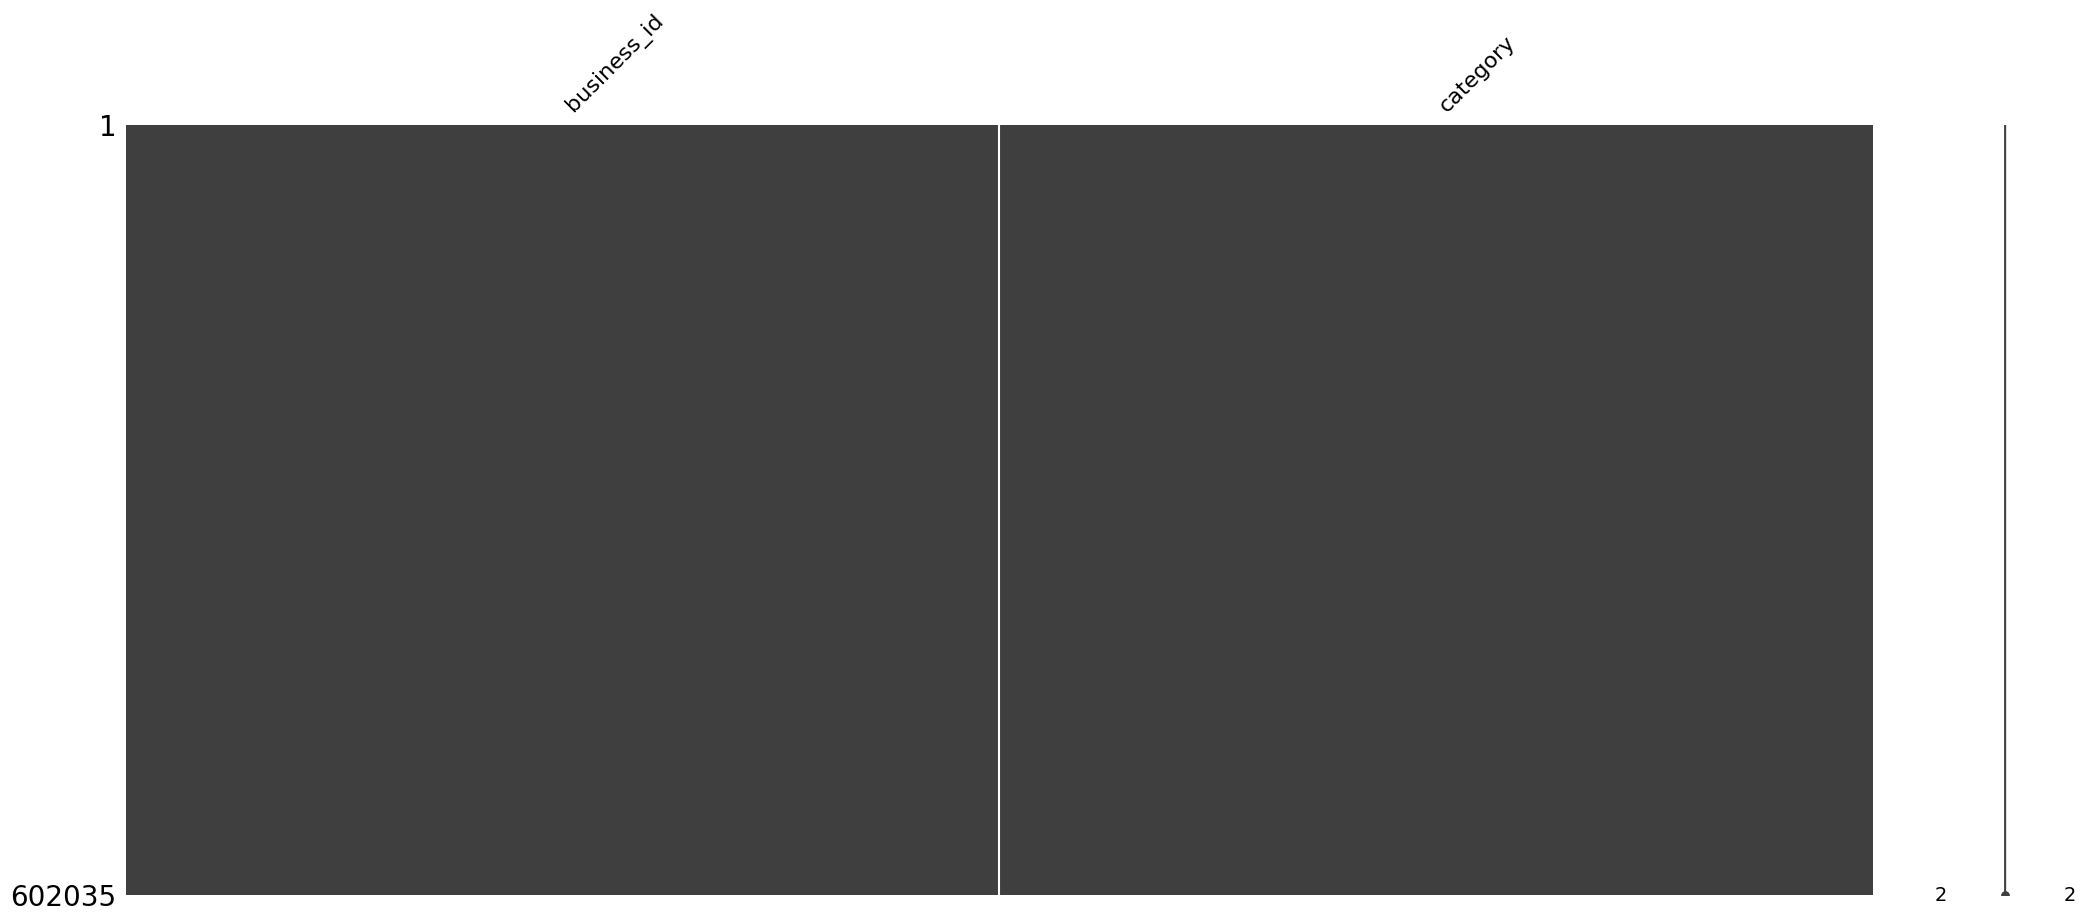

In [28]:
msno.matrix(df_category)

### ___________________________________________________________________________________________________________________________________________________________________________

# Estudio de df_business category:

In [29]:
df_category.head(5)

,business_id,category
0,MTSW4McQd7CbVtyjqoe9mw,Restaurants
1,MTSW4McQd7CbVtyjqoe9mw,Food
2,MTSW4McQd7CbVtyjqoe9mw,Bubble Tea
3,MTSW4McQd7CbVtyjqoe9mw,Coffee & Tea
4,MTSW4McQd7CbVtyjqoe9mw,Bakeries


In [30]:
df_category.describe()

,business_id,category
count,602035,602035
unique,132342,1298
top,ytynqOUb3hjKeJfRj5Tshw,Restaurants
freq,36,51291


In [34]:
# Generar el informe de análisis
profile = pandas_profiling.ProfileReport(df_category)

# Mostrar el informe
profile.to_file("yelp_bussines_category.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# _____________________________________________________________________________________________________________________________________________________________________________________